In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import SG_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 1000
Niter = 4*int(1e4)
alpha_SG = 1e-5
nexperiments = 10
results_array_SG = []
distribution_array_SG = []
for _ in range(nexperiments):
    r_SG, d_SG = SG_OAIS(phi, pi, q, N, Niter, alpha=alpha_SG, fixed=False)
    results_array_SG.append(r_SG)
    distribution_array_SG.append(d_SG)


100%|██████████| 40000/40000 [06:27<00:00, 103.15it/s]


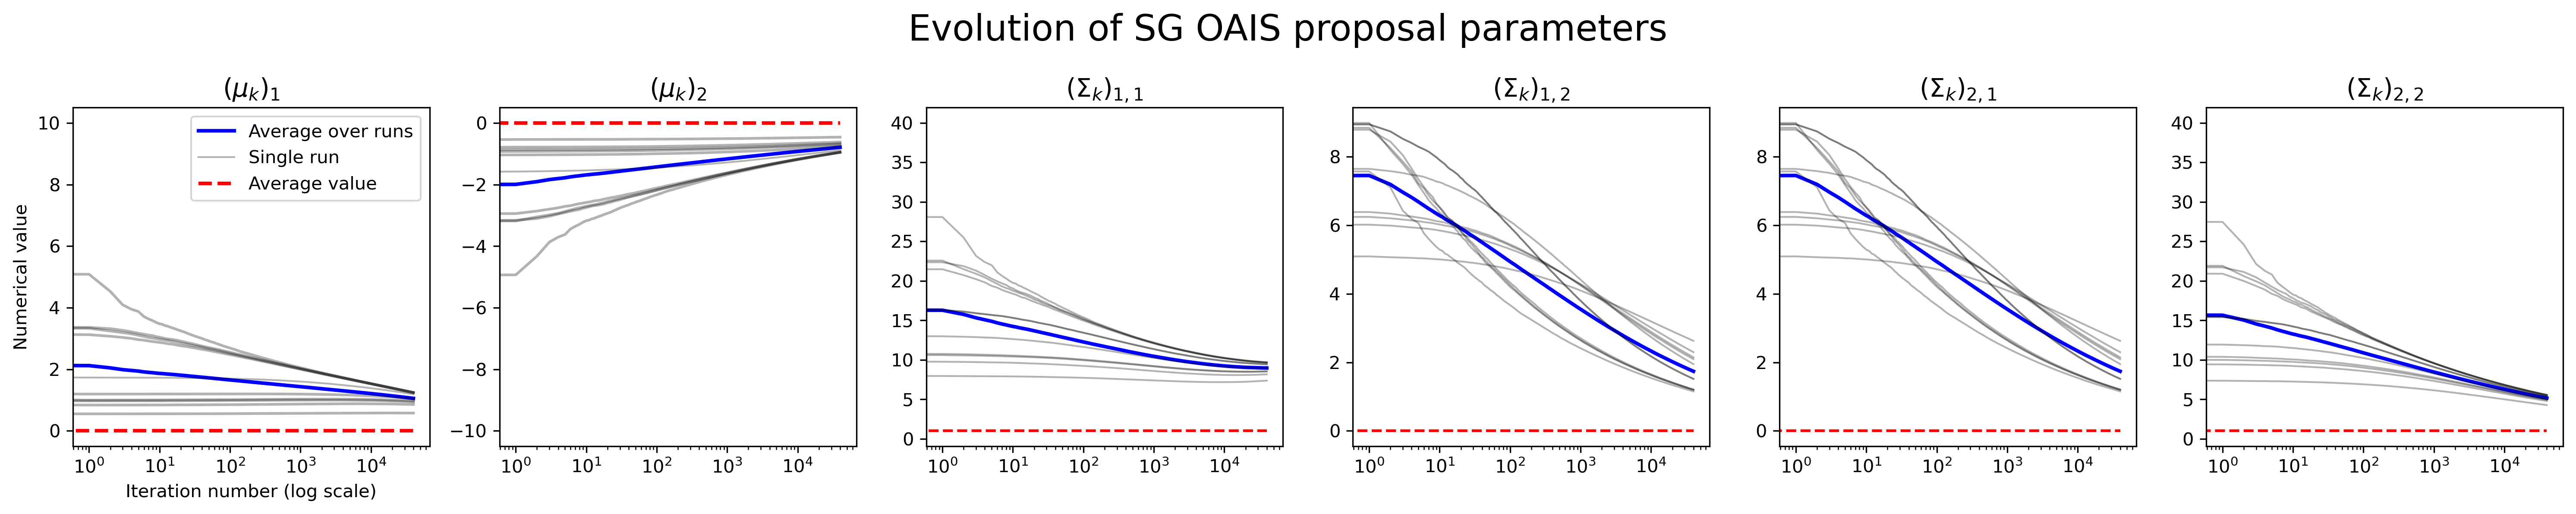

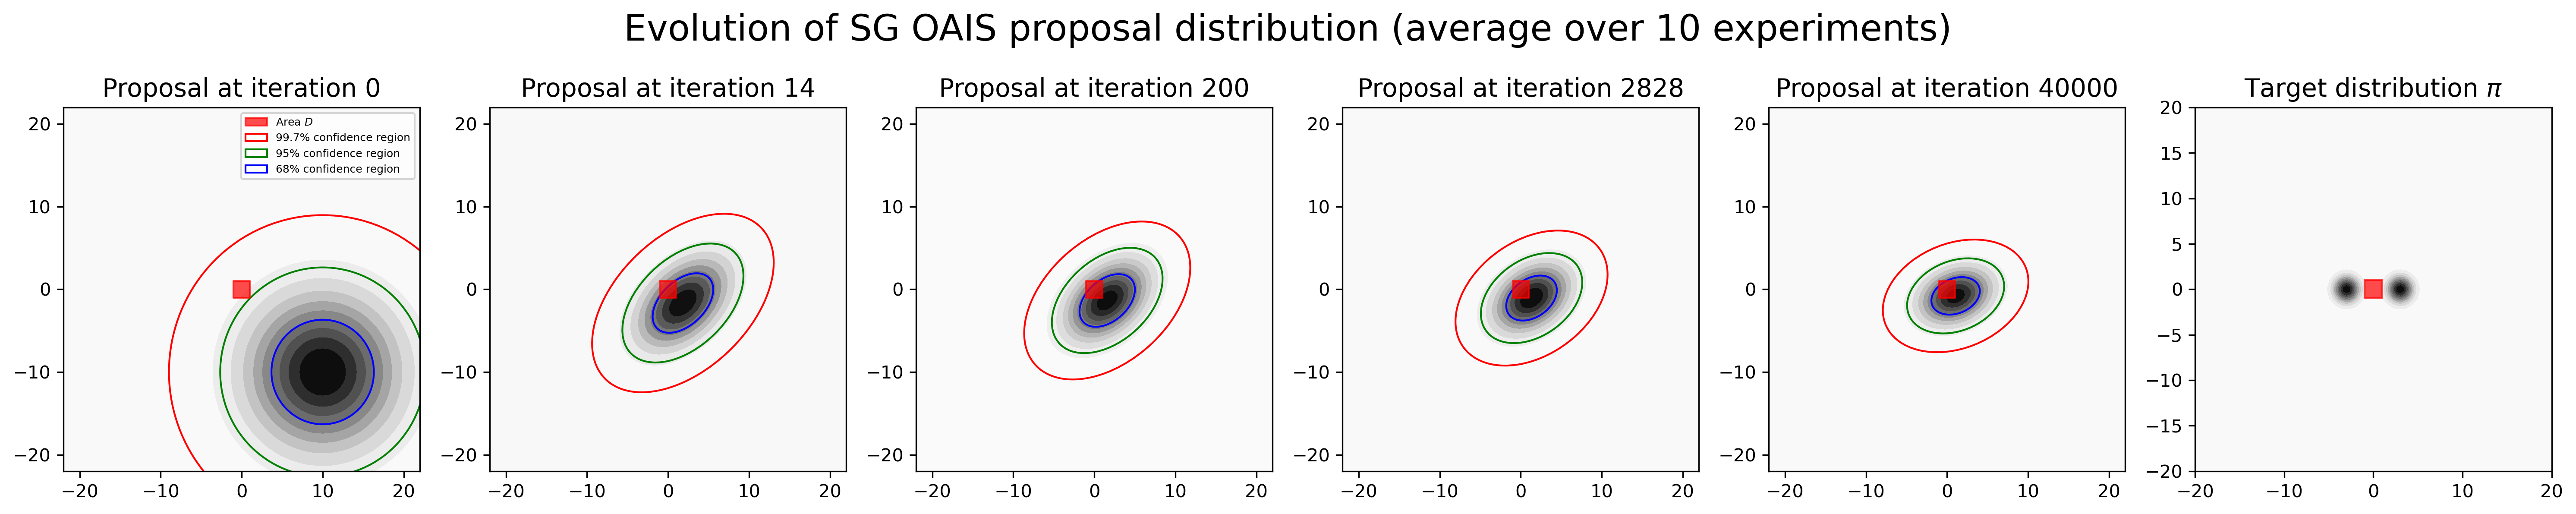

In [3]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "SGD"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters"
plotter(distribution_array_SG, pi, title=title, mix=True, alpha=0.3)
plt.show()
plot_contours(distribution_array_SG, pi, title=f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal distribution (average over {nexperiments} experiments)", mix=True)
plt.show()

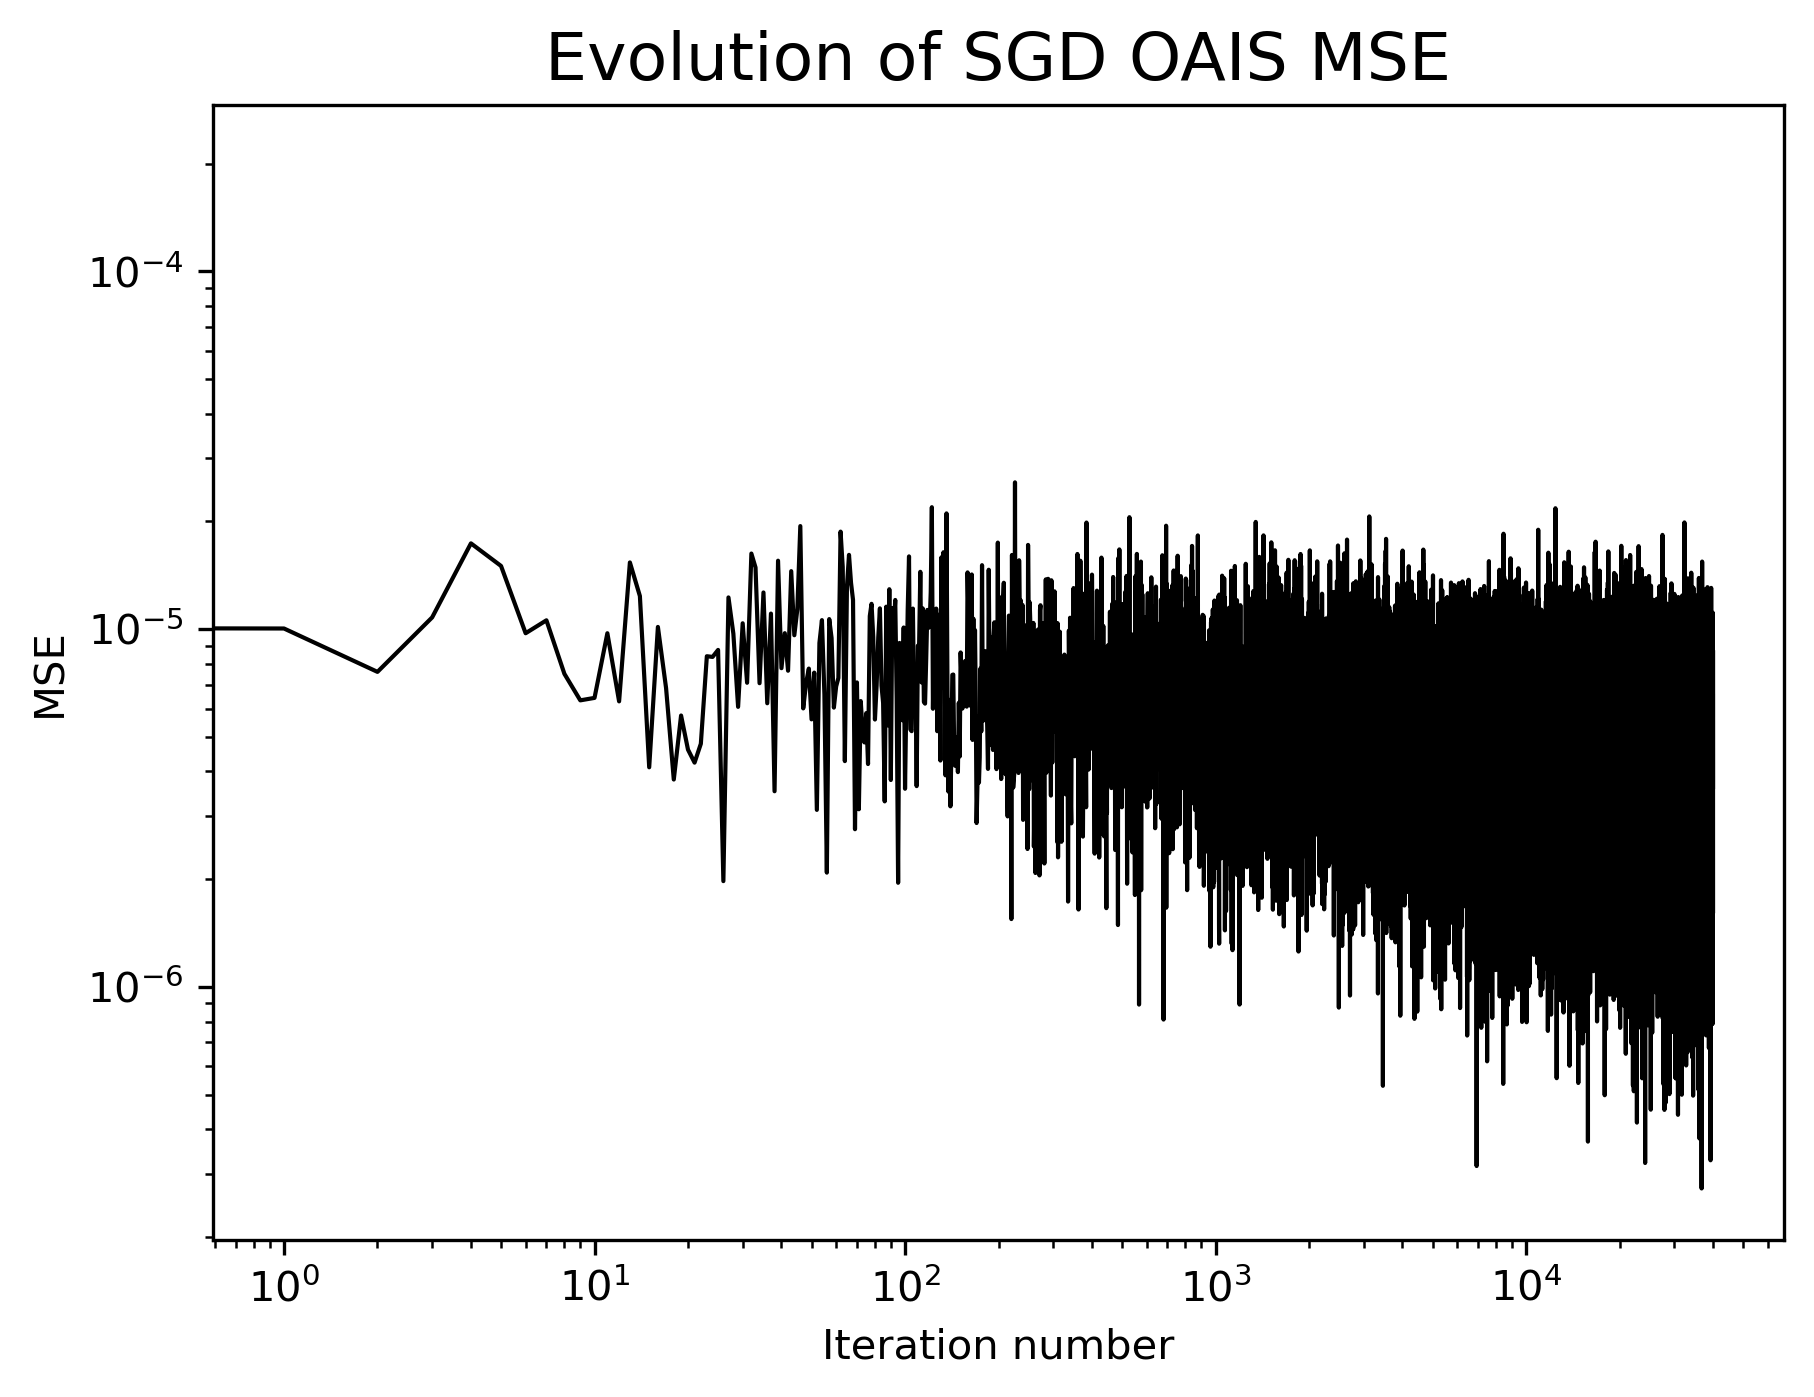

In [4]:
GT = mcsim(phi, pi, N=int(1e6))
plot_mse(results_array_SG, GT, title=f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.title(f"Evolution of {optimiser} OAIS MSE", fontsize=16)
plt.xscale("log")
plt.yscale("log")

In [5]:
N = 1000
Niter = int(1e4)
alpha_SG_fail = 1e-4
nexperiments = 10
results_array_SG_fail = []
distribution_array_SG_fail = []
for _ in range(nexperiments):
    r_SG, d_SG = SG_OAIS(phi, pi, q, N, Niter, alpha=alpha_SG_fail, fixed=False, proj_eps=1e-12, proj_set=1e-3)
    results_array_SG_fail.append(r_SG)
    distribution_array_SG_fail.append(d_SG)


  1%|          | 52/10000 [00:00<01:42, 97.18it/s] 

projecting
281851.2311177419


  0%|          | 22/10000 [00:00<01:33, 106.54it/s]

projecting
554.1066861087758


  0%|          | 33/10000 [00:00<01:35, 104.11it/s]

projecting
637.9670853274494


100%|██████████| 10000/10000 [01:31<00:00, 108.75it/s]


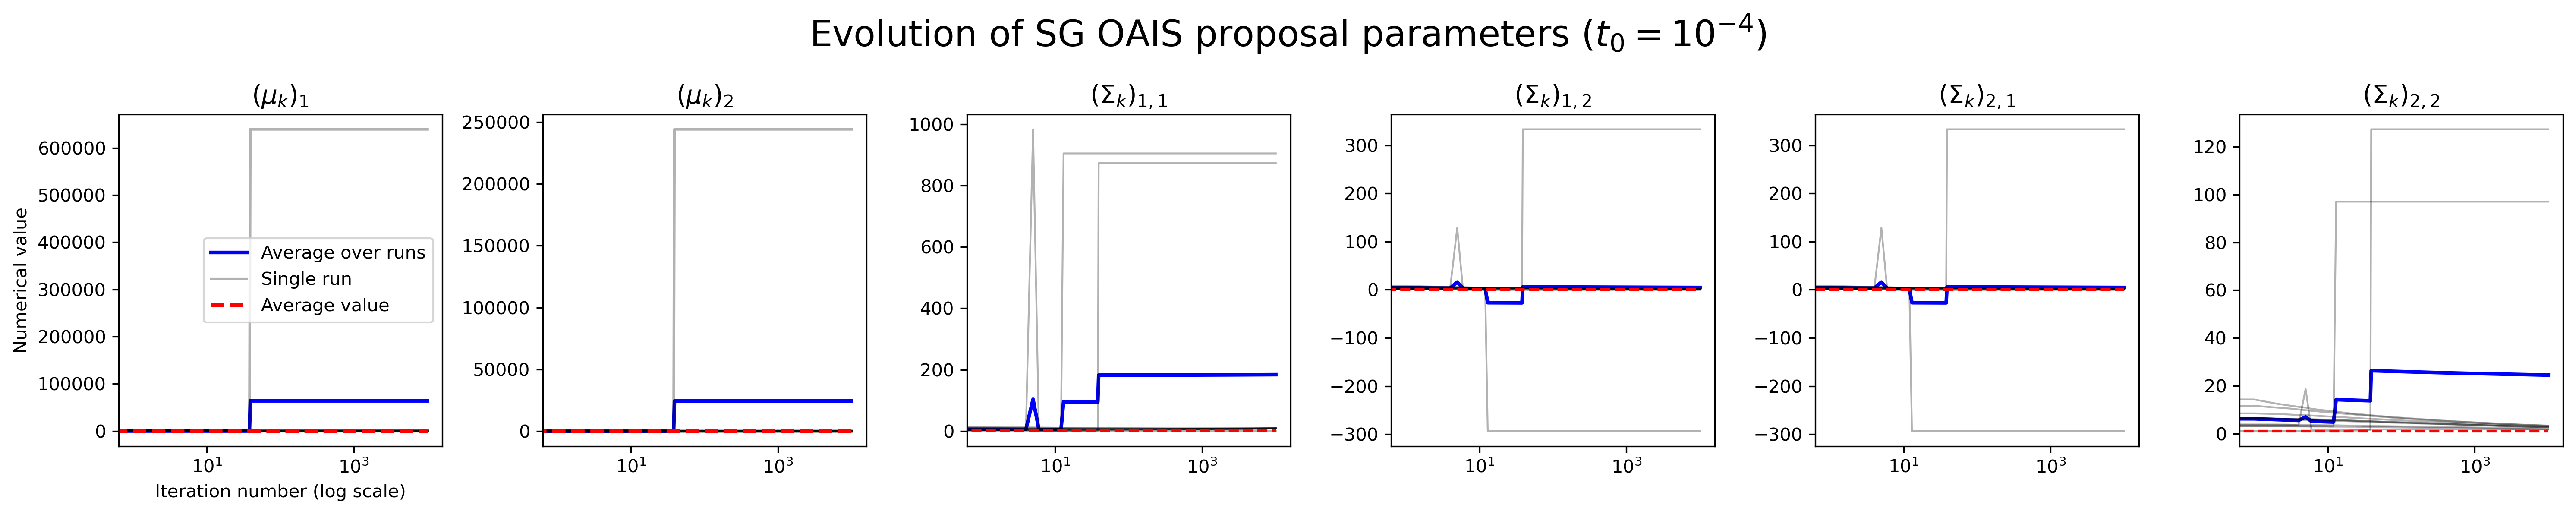

In [7]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "SGD"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters ($t_0 = 10^{{-4}}$)"
plotter(distribution_array_SG_fail, pi, title=title, mix=True, alpha=0.3)
plt.show()